# Tables for thesis

In [9]:
import pandas as pd
import numpy as np
import glob
import os
import json
import re
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [10]:
# directory management
wdir = os.getcwd()
udir = os.path.join(os.path.split(wdir)[0], "utils")
ddir = os.path.join(os.path.split(os.path.split(wdir)[0])[0], "fair_ml_thesis_data", "rawdata")
cdir = os.path.join(os.path.split(os.path.split(wdir)[0])[0], "fair_ml_thesis_data", "clustering")
adir = os.path.join(os.path.split(os.path.split(wdir)[0])[0], "fair_ml_thesis_data", "aggregated")

json_file_path = os.path.join(udir,'tasks_metadata.json')
with open(json_file_path, 'r') as j:
    task_infos = json.loads(j.read())

## Create aggregated data (for all years and for each year separately)

In [17]:
years = task_infos['years']
task='ACSEmployment'

all_data = []
# for each single year
for year in years:
    all_dfs = []
    data_paths = glob.glob(os.path.join(ddir,str(year),'1-Year')+f'/*_{task}.csv')

    for file_path in data_paths:
        df = pd.read_csv(file_path, sep=",")
        df['STATE'] = os.path.split(file_path)[1][5:7]
        all_dfs.append(df)


    # sepcific preprocessing for data columns
    data = pd.concat(all_dfs, ignore_index=True)
    # keep only age between 16 and 90
    data = data[data['AGEP'].between(16, 90)]
    data['YEAR'] = year
    all_data.append(data)
    # recode race column to have 3 values only
    data['RAC1P'] = pd.to_numeric(data['RAC1P'])
    data.loc[data['RAC1P'] > 2, 'RAC1P'] = 3

    for i in ["SCHL", "MAR", "CIT", "SEX", "RAC1P"]:
        print(f"column: {i}")
        # remove the trailing zero by turning categorical numbers into ints
        data.loc[:, i] = data[i].astype(np.int64)
        # then treat columns as categories
        data.loc[:, i] = data[i].astype("category")

    # select data columns for clustering tasks
    X = data[["AGEP", "SCHL", "MAR", "CIT", "SEX", "RAC1P", "STATE"]]
    # first standard scaler over numerical columns (AGEP only)
    standard_scaler = StandardScaler()
    X[["AGEP"]] = standard_scaler.fit_transform(X[["AGEP"]])

    X.to_csv(os.path.join(adir, task, f'{task}_clustering_{str(year)}.csv'),sep=',')

final_data = pd.concat(all_data, ignore_index=True)
final_data.to_csv(os.path.join(adir, task, f'{task}_all.csv'),sep=',', index=False)

column: SCHL
column: MAR


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)


column: CIT
column: SEX


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

column: RAC1P


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["AGEP"]] = standard_scaler.fit_transform(X[["AGEP"]])


column: SCHL
column: MAR


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)


column: CIT
column: SEX


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

column: RAC1P


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["AGEP"]] = standard_scaler.fit_transform(X[["AGEP"]])


column: SCHL
column: MAR


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)


column: CIT
column: SEX


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

column: RAC1P


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["AGEP"]] = standard_scaler.fit_transform(X[["AGEP"]])


column: SCHL
column: MAR


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)


column: CIT
column: SEX


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

column: RAC1P


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["AGEP"]] = standard_scaler.fit_transform(X[["AGEP"]])


column: SCHL
column: MAR


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)


column: CIT
column: SEX


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i] = data[i].astype(np.int64)
C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

column: RAC1P


C:\Users\sarab\AppData\Local\Temp\ipykernel_6832\1980966383.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["AGEP"]] = standard_scaler.fit_transform(X[["AGEP"]])


## Try to get count dict of class values considering protected attributes too

In [ ]:
for year in years:
    data = pd.read_csv(os.path.join(adir, task, f'{task}_clustering_{str(year)}.csv'),sep=',')
    data.groupby(by=['STATE','ESR'])

## Explore clustering from kprototypes

In [4]:
clustering_results = pd.read_csv(os.path.join(cdir,'2014','ACSEmployment','ACSEmployment_2014_kproto_5.csv'),sep=',')
results = clustering_results.groupby(['STATE'])['PREDICTION'].value_counts(normalize=True).to_frame('pred').reset_index()
results

,STATE,PREDICTION,pred
0,AK,4,0.280646
1,AK,0,0.217580
2,AK,3,0.210485
3,AK,2,0.187032
4,AK,1,0.104257
...,...,...,...
250,WY,0,0.213380
251,WY,2,0.213161
252,WY,4,0.212943
253,WY,3,0.202449


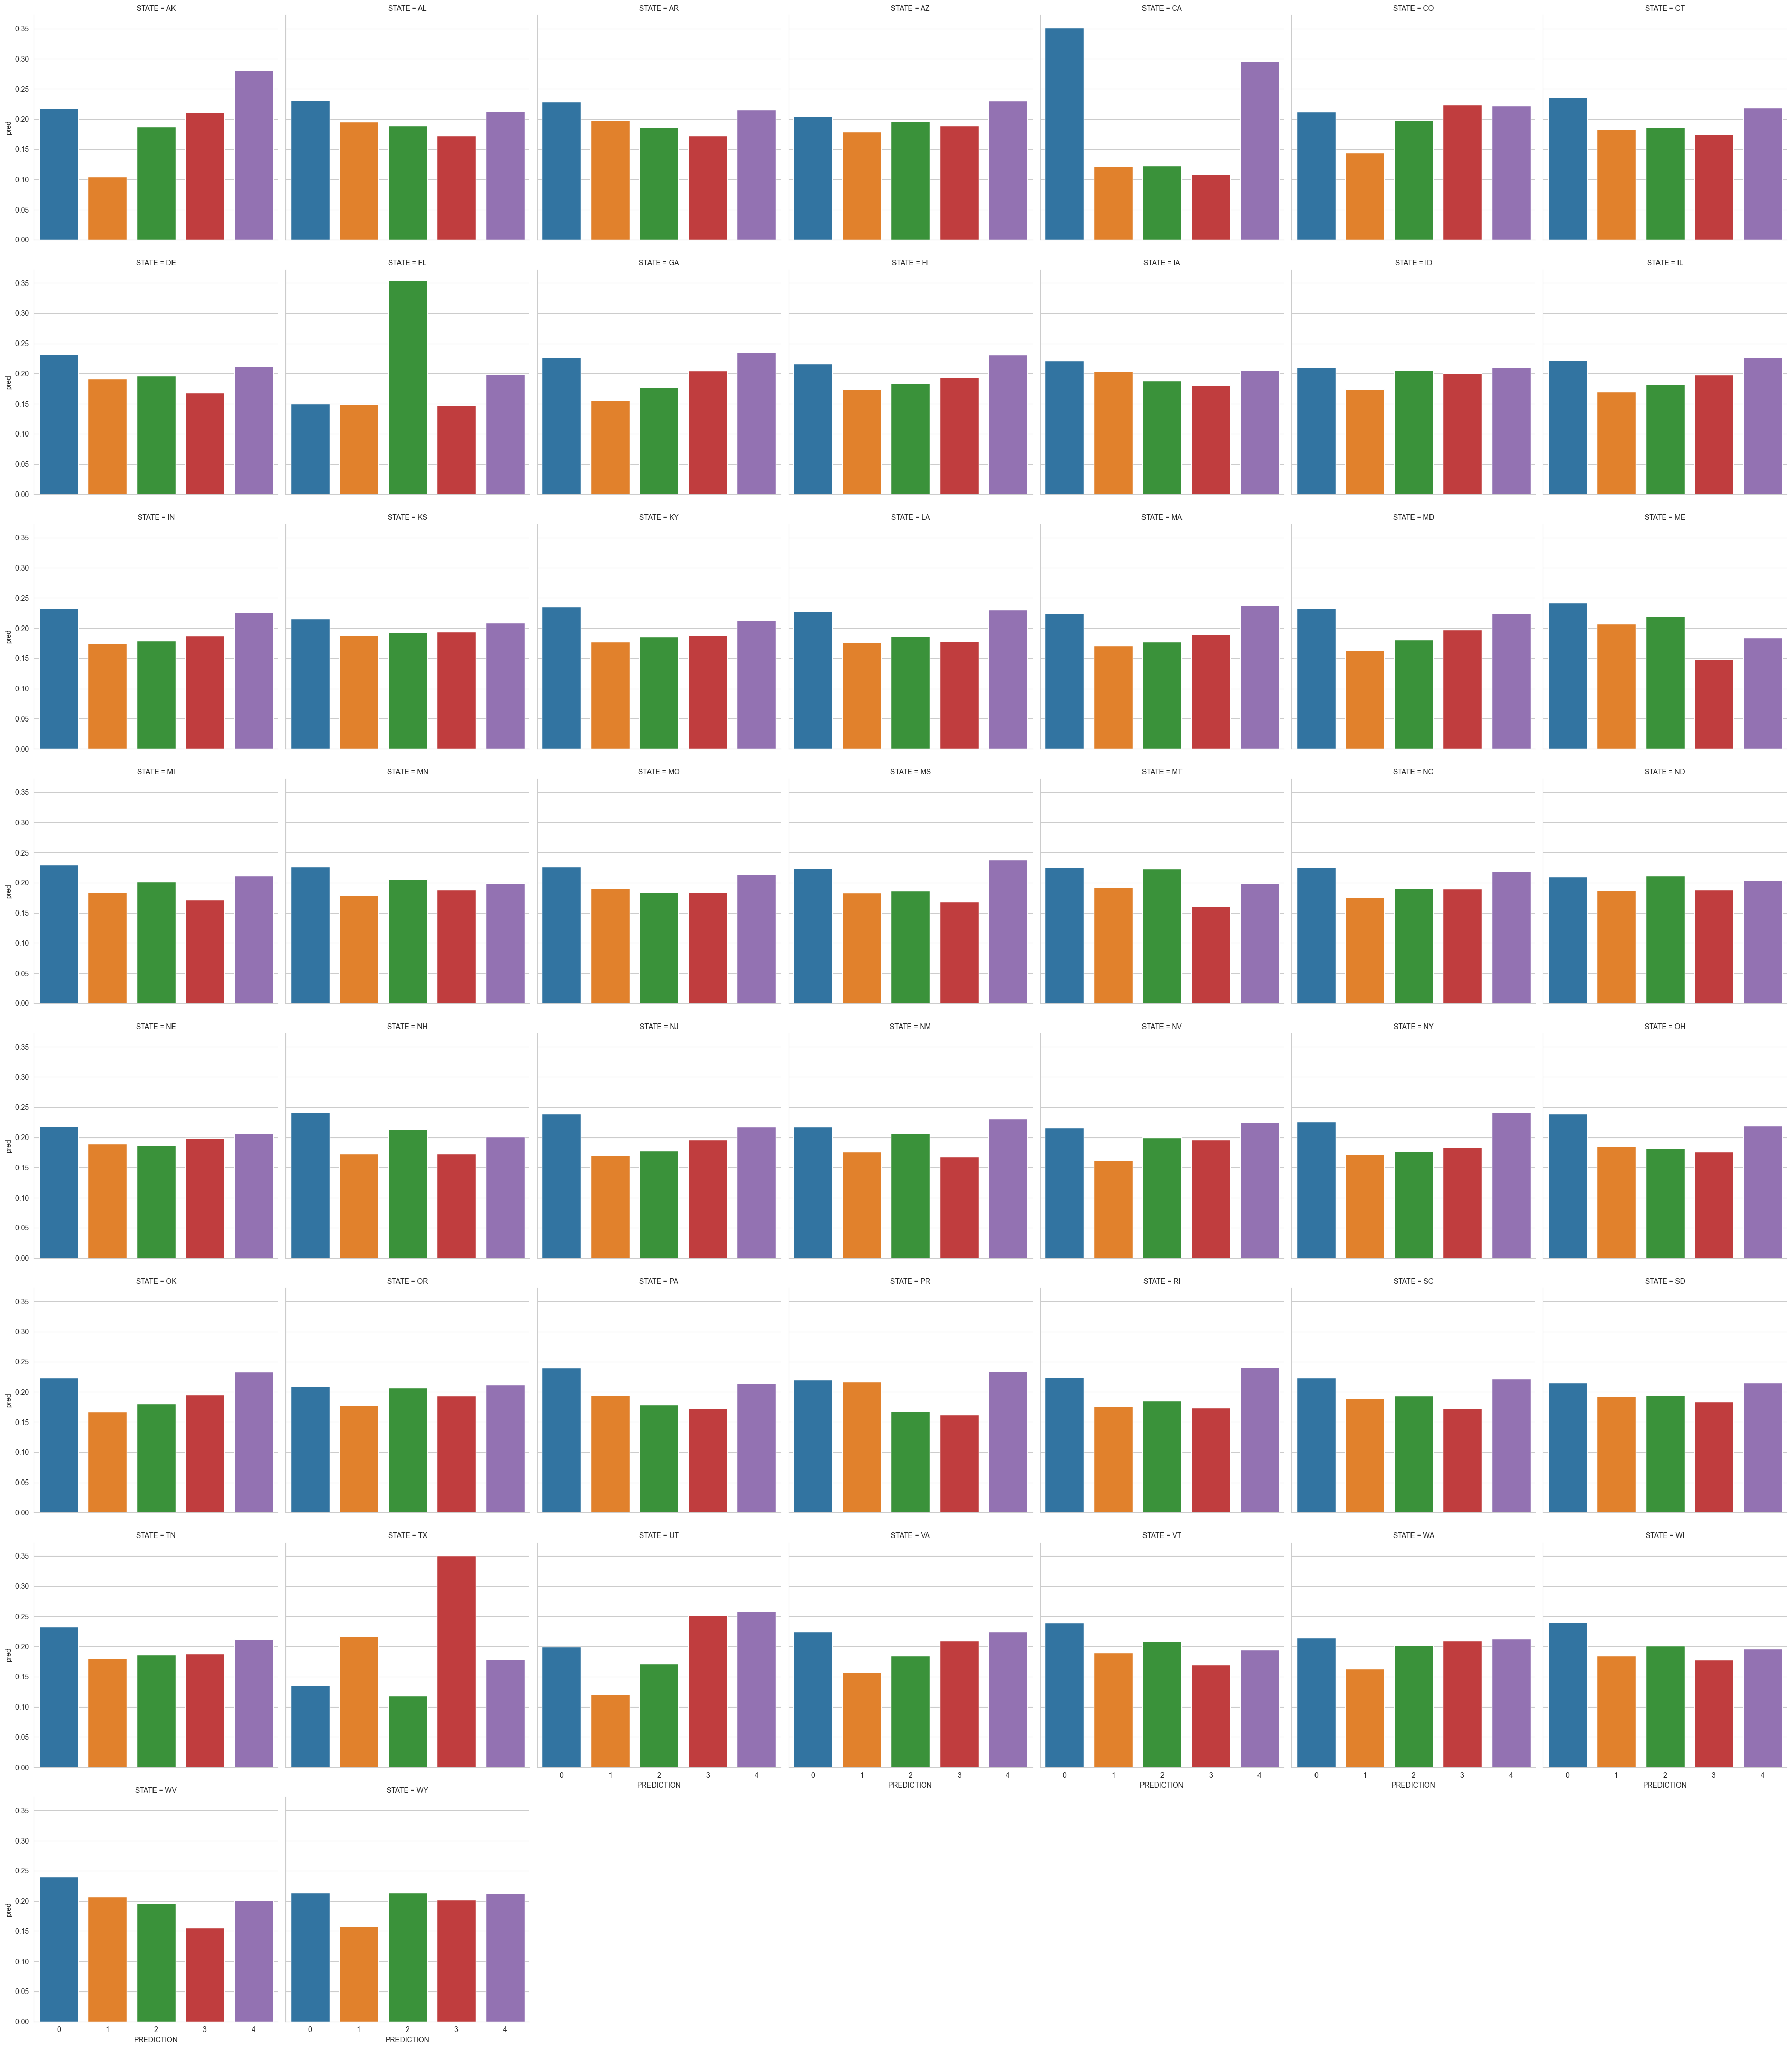

In [8]:
import seaborn as sns

sns.catplot(data=results, x='PREDICTION', y='pred', col='STATE', col_wrap=7, kind='bar')

## Create year table with this info for each state:
- sample size
- share of positive class
- share of male vs female
- share of white/black/other
- share of privileged group in positive class (sex)
- share of privileged group in positive class (race)

In [3]:
# get all files for year y
year=2014
task='ACSEmployment'
data_file_paths = glob.glob(os.path.join(ddir, str(year), '1-Year') + f'/{str(year)}*_{task}.csv')
data_file_paths

['C:\\Users\\sarab\\Desktop\\Data_Science_MSc\\master_thesis\\fair_ml_thesis_data\\rawdata\\2014\\1-Year\\2014_AK_ACSEmployment.csv',
 'C:\\Users\\sarab\\Desktop\\Data_Science_MSc\\master_thesis\\fair_ml_thesis_data\\rawdata\\2014\\1-Year\\2014_AL_ACSEmployment.csv',
 'C:\\Users\\sarab\\Desktop\\Data_Science_MSc\\master_thesis\\fair_ml_thesis_data\\rawdata\\2014\\1-Year\\2014_AR_ACSEmployment.csv',
 'C:\\Users\\sarab\\Desktop\\Data_Science_MSc\\master_thesis\\fair_ml_thesis_data\\rawdata\\2014\\1-Year\\2014_AZ_ACSEmployment.csv',
 'C:\\Users\\sarab\\Desktop\\Data_Science_MSc\\master_thesis\\fair_ml_thesis_data\\rawdata\\2014\\1-Year\\2014_CA_ACSEmployment.csv',
 'C:\\Users\\sarab\\Desktop\\Data_Science_MSc\\master_thesis\\fair_ml_thesis_data\\rawdata\\2014\\1-Year\\2014_CO_ACSEmployment.csv',
 'C:\\Users\\sarab\\Desktop\\Data_Science_MSc\\master_thesis\\fair_ml_thesis_data\\rawdata\\2014\\1-Year\\2014_CT_ACSEmployment.csv',
 'C:\\Users\\sarab\\Desktop\\Data_Science_MSc\\master_thesis\\

In [4]:
state_pattern = re.compile(r"_([^_]+)_")
test_path = Path(data_file_paths[0])
print(state_pattern.findall(test_path.name)[-1])

AK


In [5]:
table_1 = {'state':[],'sample_size':[], '%_employed_dataset':[],
           '%_male':[],'%_female':[],'%_white':[],'%_black':[],'%_other':[],
           '%_male_employed':[], '%_white_employed':[]}

for p in data_file_paths:

    # load data and change RAC1P values
    df = pd.read_csv(p)
    # age between 16 and 90
    df = df[df['AGEP'].between(16,90)]
    df['RAC1P'] = pd.to_numeric(df['RAC1P'])
    df.loc[df['RAC1P'] > 2, 'RAC1P'] = 3
    # state name
    table_1['state'].append(state_pattern.findall(p)[-1])
    # sample size
    table_1['sample_size'].append(len(df))
    # percentage of employed (esr 1) in dataset
    table_1['%_employed_dataset'].append(round(df['ESR'].value_counts(normalize=True).to_dict()[1],5)*100)
    # share of male and female
    table_1['%_male'].append(round(df['SEX'].value_counts(normalize=True).to_dict()[1.0],5)*100)
    table_1['%_female'].append(round(df['SEX'].value_counts(normalize=True).to_dict()[2.0],5)*100)
    # share of white,black,other (RAC1P)
    table_1['%_white'].append(round(df['RAC1P'].value_counts(normalize=True).to_dict()[1.0],5)*100)
    table_1['%_black'].append(round(df['RAC1P'].value_counts(normalize=True).to_dict()[2.0],5)*100)
    table_1['%_other'].append(round(df['RAC1P'].value_counts(normalize=True).to_dict()[3.0],5)*100)
    # share of male employed
    table_1['%_male_employed'].append(round( (len(df[ (df['SEX']==1.0) & (df['ESR']==1) ])/len(df[df['ESR']==1]))*100
                                             ,5))
    # share of white employed
    table_1['%_white_employed'].append(round( (len(df[ (df['RAC1P']==1.0) & (df['ESR']==1) ])/len(df[df['ESR']==1]))*100
                                             ,5))
table1_final = pd.DataFrame.from_dict(table_1)
table1_final

,state,sample_size,%_employed_dataset,%_male,%_female,%_white,%_black,%_other,%_male_employed,%_white_employed
0,AK,5074,55.045,52.976,47.024,56.957,1.498,41.545,53.41926,62.51343
1,AL,39150,48.447,47.290,52.710,73.195,23.438,3.367,51.94285,75.53119
2,AR,23861,48.845,48.032,51.968,82.302,13.558,4.141,52.62977,83.45774
3,AZ,52589,50.326,49.351,50.649,79.125,3.520,17.355,52.79604,80.07632
4,CA,298838,53.698,49.071,50.929,63.793,5.344,30.863,53.66237,63.48975
5,CO,42090,60.102,49.587,50.413,87.824,3.146,9.031,52.88374,88.43736
6,CT,29475,58.209,47.820,52.180,82.025,8.438,9.537,50.92382,82.87579
7,DE,7406,54.456,48.191,51.809,76.789,16.500,6.711,50.38433,76.64270
8,FL,160571,50.110,47.695,52.305,80.361,13.302,6.337,50.90602,80.00298
9,GA,77261,52.746,47.944,52.056,66.798,26.549,6.653,51.52140,68.41627


In [9]:
#table1_final.style.to_latex()
print(table1_final.to_latex())

\begin{tabular}{llrrrrrrrrr}
\toprule
{} & state &  sample\_size &  \%\_employed\_dataset &  \%\_male &  \%\_female &  \%\_white &  \%\_black &  \%\_other &  \%\_male\_employed &  \%\_white\_employed \\
\midrule
0  &    AK &         5074 &              55.045 &  52.976 &    47.024 &   56.957 &    1.498 &   41.545 &         53.41926 &          62.51343 \\
1  &    AL &        39150 &              48.447 &  47.290 &    52.710 &   73.195 &   23.438 &    3.367 &         51.94285 &          75.53119 \\
2  &    AR &        23861 &              48.845 &  48.032 &    51.968 &   82.302 &   13.558 &    4.141 &         52.62977 &          83.45774 \\
3  &    AZ &        52589 &              50.326 &  49.351 &    50.649 &   79.125 &    3.520 &   17.355 &         52.79604 &          80.07632 \\
4  &    CA &       298838 &              53.698 &  49.071 &    50.929 &   63.793 &    5.344 &   30.863 &         53.66237 &          63.48975 \\
5  &    CO &        42090 &              60.102 &  49.587 &    

C:\Users\sarab\AppData\Local\Temp\ipykernel_12940\792255623.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table1_final.to_latex())


## Table with original fairness metrics for each state in a specific year